In [7]:
import pandas as pd
import numpy as np
from mplsoccer import Sbopen, VerticalPitch
import matplotlib.pyplot as plt

match_id = 3835331

In [8]:
parser = Sbopen()

df_event = parser.event(match_id)[0]
event = df_event.loc[df_event["outcome_name"] == 'Goal'].loc[df_event["player_name"] == 'Hanna Ulrika Bennison']
event_id = event["id"].iloc[0]
event_id

'5a1caa7d-caaa-40bd-9365-76bd5c14915b'

In [18]:
df_frame, df_visible = parser.frame(match_id)

[114.91445192752,
 0.0,
 3.88466748763363,
 0.0,
 39.773639206618,
 73.428058287301,
 80.521277751441,
 73.4064904494337,
 114.91445192752,
 0.0]

In [35]:
va = np.array(df_frame[(df_frame.id==event_id) & (df_frame.teammate==True)][['x','y']]).reshape(-1,2)
va2 = np.array(df_frame[(df_frame.id==event_id) & (df_frame.teammate!=True)][['x','y']]).reshape(-1,2)
print('Posiciones de cada jugador')
va

Posiciones en frame


array([[ 91.21951 ,  48.67719 ],
       [ 98.798   ,  42.763832],
       [ 99.25816 ,  15.724774],
       [101.51488 ,  26.417492],
       [105.80833 ,  50.054615],
       [106.71366 ,  40.54674 ],
       [107.89515 ,  36.45198 ],
       [107.905594,  45.430923]])

In [28]:
visible_area = np.array(df_visible.loc[df_visible["id"] == event_id]['visible_area'].iloc[0]).reshape(-1, 2)
print('Posiciones Visibles')
visible_area

Posiciones Visibles


array([[120.        ,   0.        ],
       [102.84806532,   0.        ],
       [ 77.88775182,  53.9674095 ],
       [ 99.52681611,  68.345132  ],
       [120.        ,  48.60512515],
       [120.        ,   0.        ]])

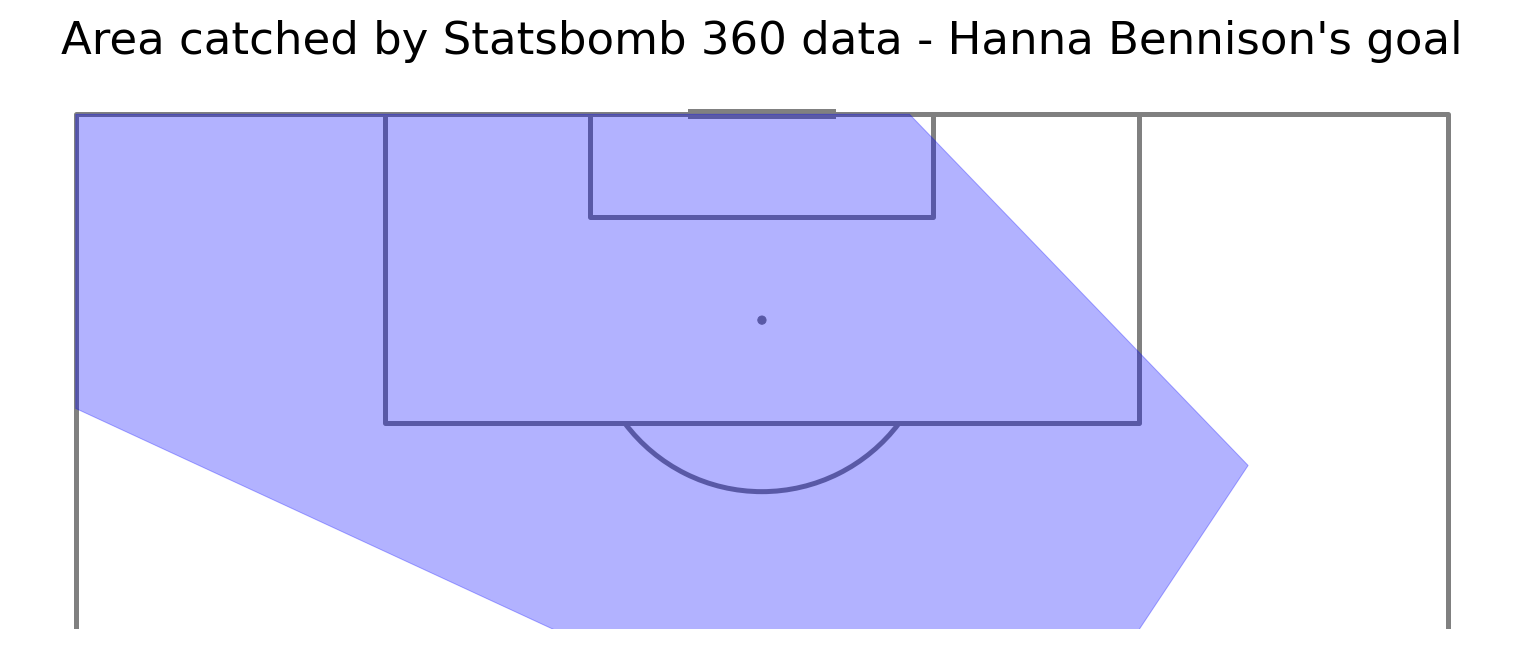

In [46]:
pitch  = VerticalPitch(line_color='grey', line_zorder = 1, half = True, pad_bottom=-30, linewidth=5)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
fig.suptitle("Area catched by Statsbomb 360 data - Hanna Bennison's goal", fontsize = 45)
plt.show()

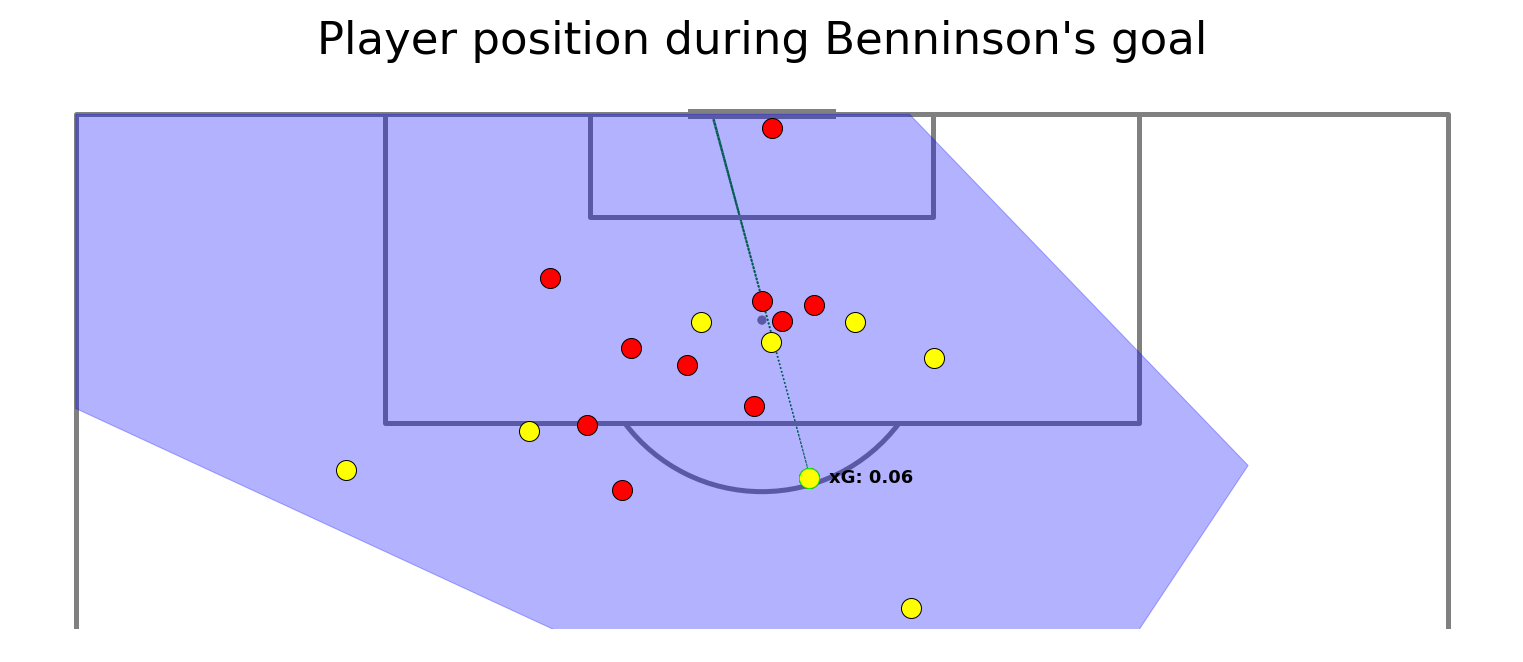

In [87]:
player_position = df_frame[df_frame.id==event_id]
team = player_position.loc[player_position["teammate"] == True]
rival = player_position.loc[player_position["teammate"] == False]
actor = player_position.loc[player_position["actor"] == True]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plot visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2) # shade visible area

# Plotting players' position
pitch.scatter(team.x, team.y, color = 'yellow', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
pitch.scatter(rival.x, rival.y, color = 'red', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
pitch.scatter(actor.x, actor.y, color = 'yellow', edgecolors = 'lime', s = 400, ax=ax['pitch'], zorder = 3)

# PLotting shot trajectory

pitch.lines(event.x, event.y,
                   event.end_x, event.end_y,
            comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 2.5)
fig.suptitle("Player position during Benninson's goal", fontsize = 45)
ax['pitch'].text(event.y.values[0] + 1,event.x.values[0],'xG: {:.2f}'.format(event.shot_statsbomb_xg.values[0]),fontsize=18,weight='bold')
plt.show();

Empleamos el método Voronoi para crear áreas que visualicen la zona que controla cada jugador, por su proximidad en relación al resto de jugadores, para esta acción y la zona "visible". Primero lo haremos solo para el equipo sueco, y luego para ambos, diferenciando en este caso qué equipo es el que controla cada área.

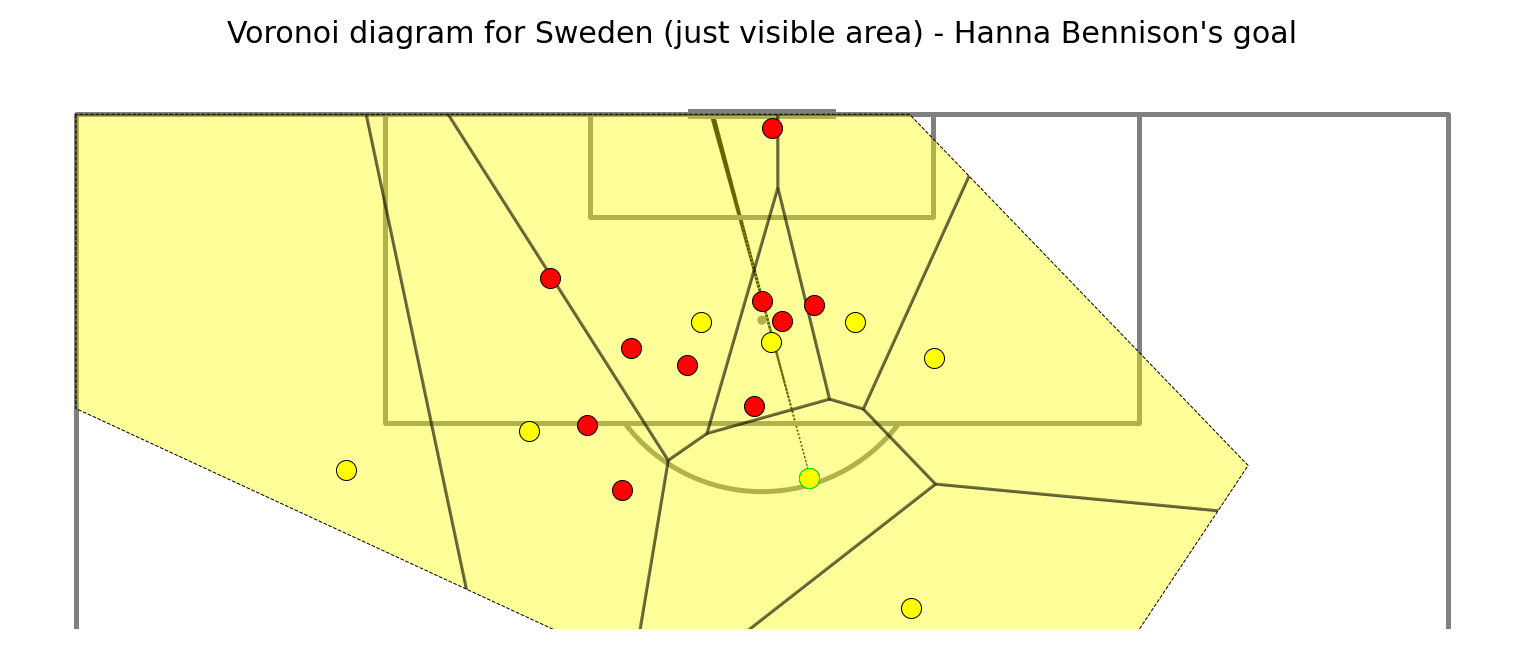

In [103]:
#Voronoi for Sweden
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
team1, _ = pitch.voronoi(team.x, team.y,
                         team.teammate)
#plot voronoi diagrams as polygons
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)
#mark visible area

visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)

pitch.scatter(team.x, team.y, color = 'yellow', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
pitch.scatter(rival.x, rival.y, color = 'red', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
pitch.scatter(actor.x, actor.y, color = 'yellow', edgecolors = 'lime', s = 400, ax=ax['pitch'], zorder = 3)

pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='black', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# just colour the polygon area
for p1 in t1:
    p1.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Sweden (just visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show();

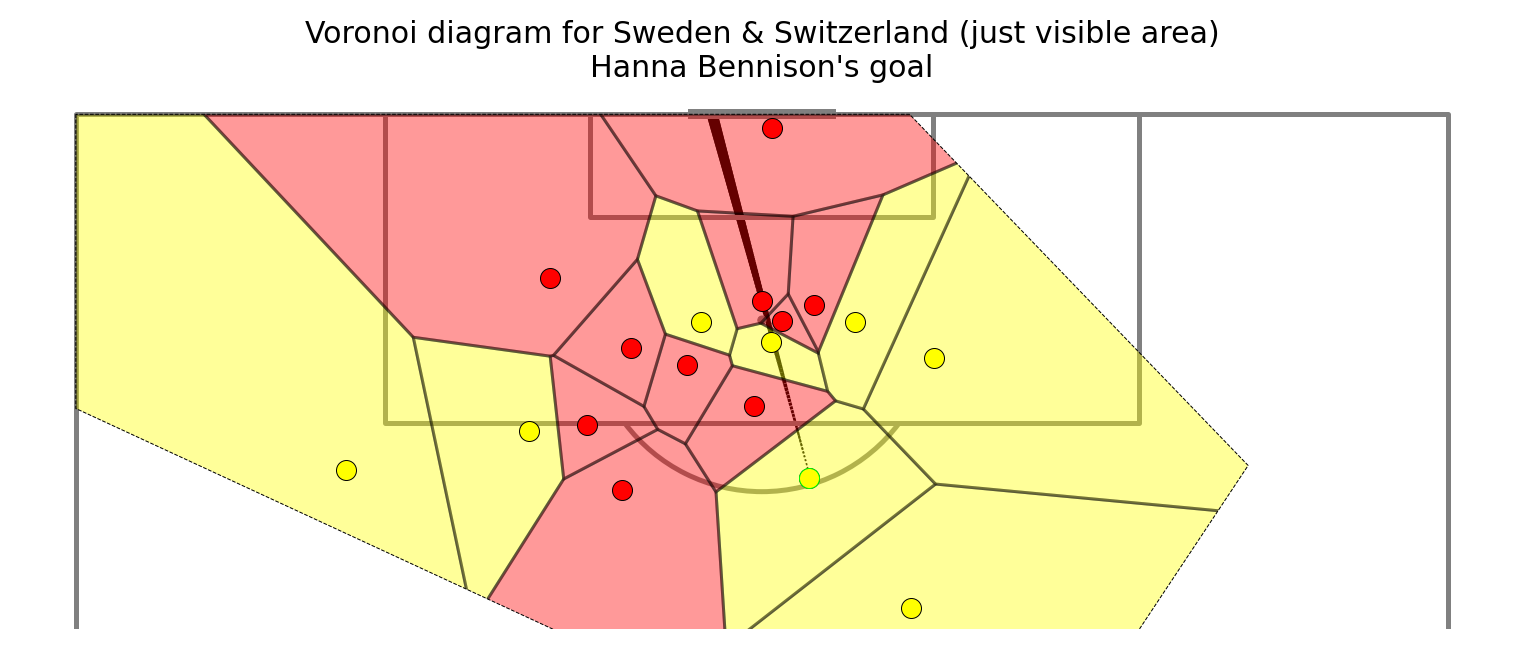

In [107]:
#Voronoi for Sweden
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
team1, team2 = pitch.voronoi(player_position.x, player_position.y,
                         player_position.teammate)
#plot voronoi diagrams as polygons
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)
t2 = pitch.polygon(team2, ax = ax["pitch"], color = 'red', ec = 'black', lw=3, alpha=0.4, zorder = 2)
#mark visible area

visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)

pitch.scatter(team.x, team.y, color = 'yellow', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
pitch.scatter(rival.x, rival.y, color = 'red', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
pitch.scatter(actor.x, actor.y, color = 'yellow', edgecolors = 'lime', s = 400, ax=ax['pitch'], zorder = 3)

pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='black', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 11)

# just colour the polygon area
for p1 in t1:
    p1.set_clip_path(visible[0])

for p2 in t2:
    p2.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Sweden & Switzerland (just visible area)\nHanna Bennison's goal", fontsize = 30)
plt.show();

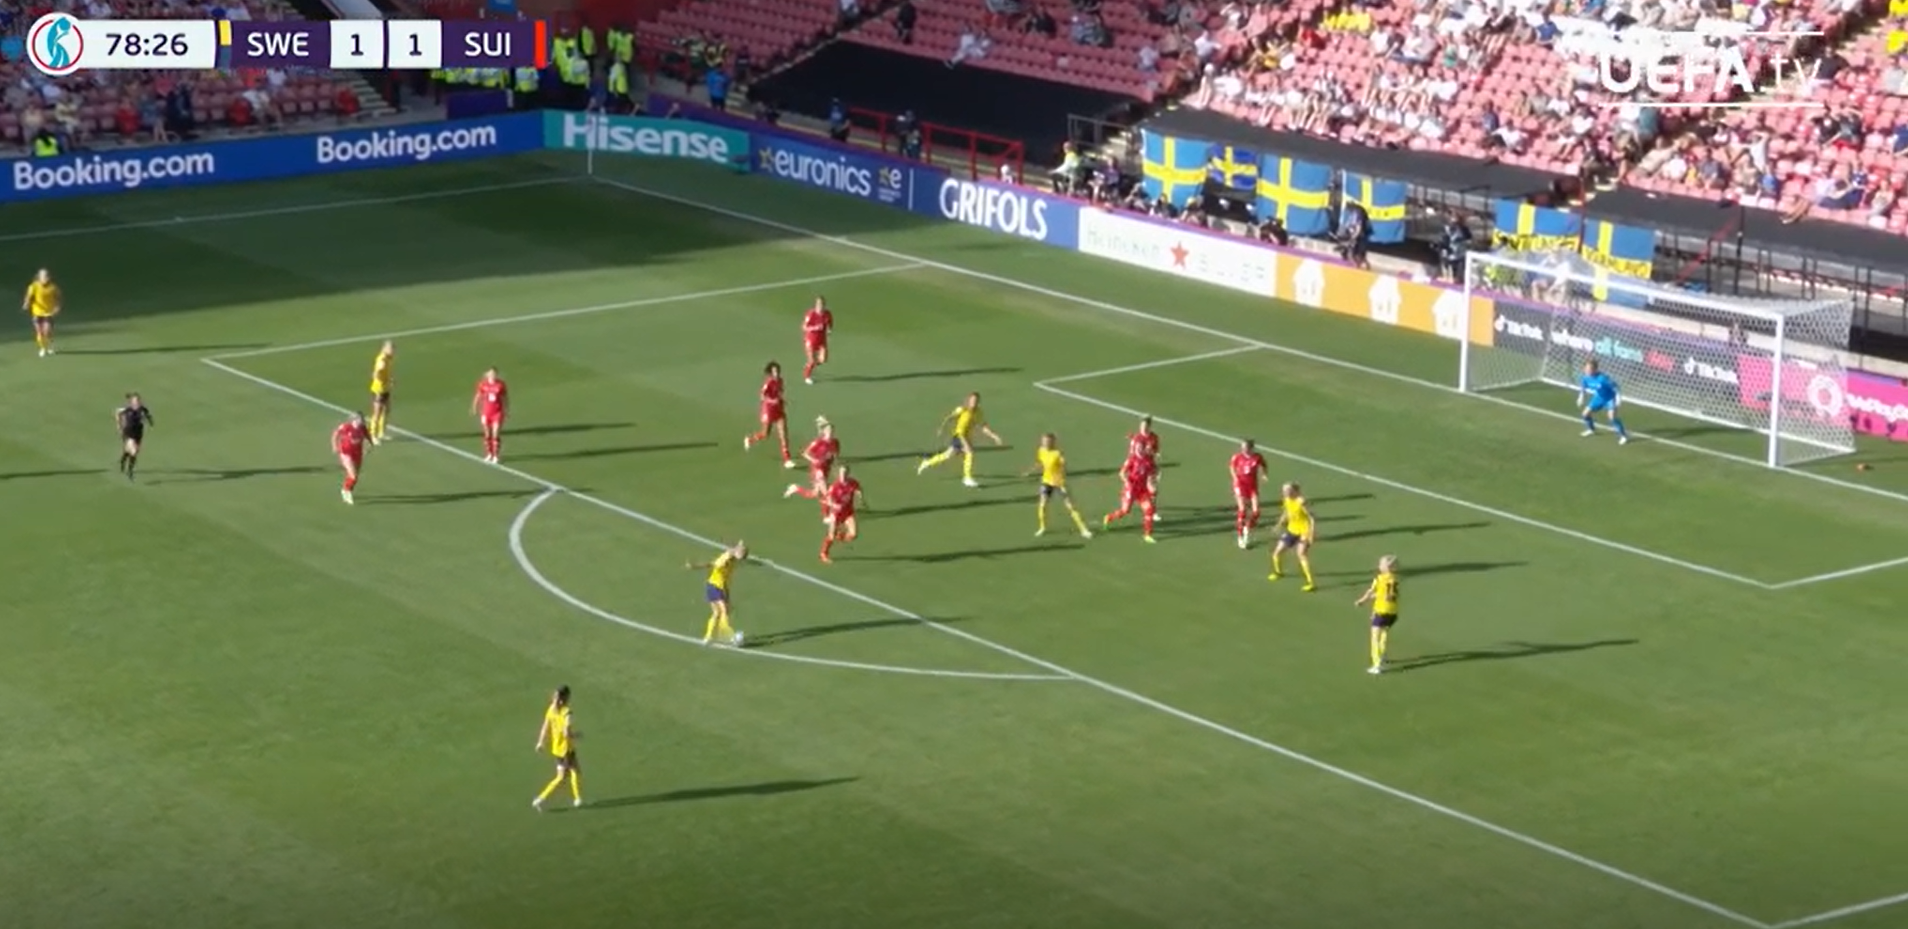